## Organização de projeto
Tenho como objetivo criar uma automação de fechamenteo de mercado usando Python atrés da coletação histícas do Ibovespa e Dólar e do envio diario atrav´s de ferramenta de e-mail automaticamente.

Vamos ter uma sequencia de passos para poder chegar na conclusão final da nossa tarefa:

**1** - Instalar e importar as nossas blibiotecas  e módulos
      - Vamos usar: 
               - mplcyberpunk (Para termos diferentes visualizações nos graficos)
               - yfinance (cotações hitóricas de processois financeiros)
               - Pandas para fazer manipulação
               - Matplotplib.pyplot pra poder usar os gráficos

**2** - Pegar as cotações hitóricas.
      - Como estou usando o Yahoo Finance, preciso ver lá como é o nome das cotações que eu vou    estar buscando.

**3** - Realizar o tratamento dos dados que viarem pra nossa mão
      -Levando em consideração que quando eu pegar os dados relacionadados as cotações que eu tenho pra fazer vou ter uma base de dados de certa forma "poluida", preciso limpar e tratar os dados para que apenas as informações que me são uteis eu consiga usar.

**4** - Criar gráficos de performance
      - Após o tratamento eu consigo gerar os graficos que vão mostrar as alterações que aconteceram nos ultimos 6 meses

**5** - Realizar os calculos retornos diários 
      - Faço o calculo para verificar qual foi o retorno que teve de um dia para o outro.

**6** - Configurar o envio de e-mail diario
            - Usei o link https://myaccount.google.com/apppasswords 
            - ele cria uma senha que faz com que o sódigo possa acessar o e-mail, mas mantendo este e-mail seguro, por não deixar a senha aberta para qualquer um que olhe o código. 


In [1]:
! pip install mplcyberpunk


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install yfinance==0.2.40


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk 

In [4]:
tickers = ["^BVSP", "^GSPC", "BRL=X"]

In [5]:
dados_mercado = yf.download(tickers, period= "6mo")
dados_mercado = dados_mercado["Adj Close"]
dados_mercado

[*********************100%%**********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-19,5.02940,127529.000,5178.509766
2024-03-20,5.03000,129125.000,5224.620117
2024-03-21,4.96620,128159.000,5241.529785
2024-03-22,4.97450,127027.000,5234.180176
2024-03-25,5.00090,126931.000,5218.189941
...,...,...,...
2024-09-13,5.62570,134882.000,5626.020020
2024-09-16,5.61237,135118.000,5633.089844
2024-09-17,5.50390,134960.000,5634.580078


### Iniciando o tratamento dos Dados

In [6]:
dados_mercado.head(50)

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-19,5.02940,127529.0,5178.509766
2024-03-20,5.03000,129125.0,5224.620117
2024-03-21,4.96620,128159.0,5241.529785
2024-03-22,4.97450,127027.0,5234.180176
2024-03-25,5.00090,126931.0,5218.189941
2024-03-26,4.97220,126863.0,5203.580078
2024-03-27,4.97570,127691.0,5248.490234
2024-03-28,4.99030,128106.0,5254.350098
2024-03-29,5.01410,NaN,NaN


In [7]:
dados_mercado = dados_mercado.dropna()
dados_mercado.columns =["Dólar", "IBOVESPA", "S&P500"]

dados_mercado


,Dólar,IBOVESPA,S&P500
Date,,,
2024-03-19,5.02940,127529.000,5178.509766
2024-03-20,5.03000,129125.000,5224.620117
2024-03-21,4.96620,128159.000,5241.529785
2024-03-22,4.97450,127027.000,5234.180176
2024-03-25,5.00090,126931.000,5218.189941
...,...,...,...
2024-09-13,5.62570,134882.000,5626.020020
2024-09-16,5.61237,135118.000,5633.089844
2024-09-17,5.50390,134960.000,5634.580078


In [8]:
plt.style.use("cyberpunk")

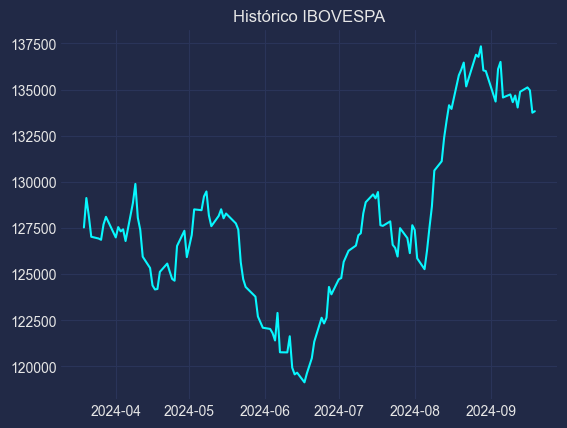

In [9]:
plt.plot (dados_mercado["IBOVESPA"])
plt.title("Histórico IBOVESPA")
plt.savefig("ibovespa.png")

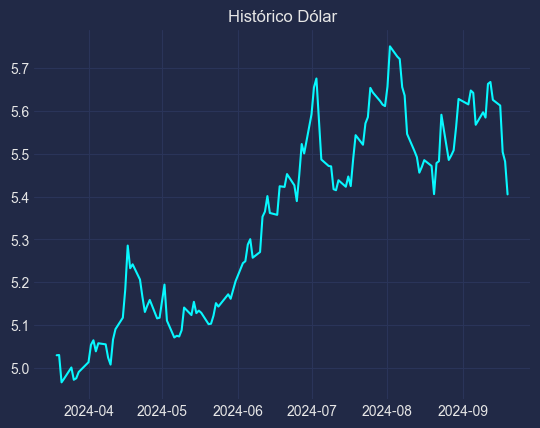

In [10]:
plt.plot (dados_mercado["Dólar"])
plt.title("Histórico Dólar")
plt.savefig("dolar.png")

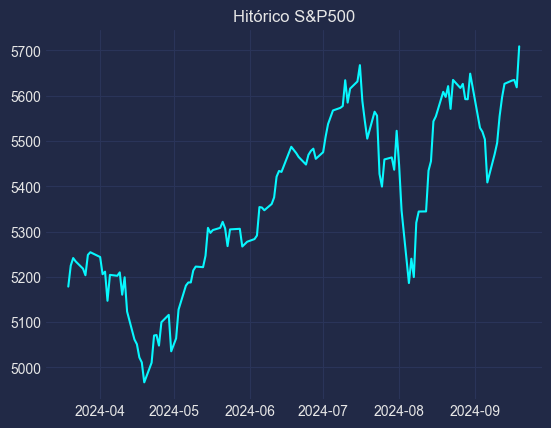

In [11]:
plt.plot(dados_mercado['S&P500'])
plt.title("Hitórico S&P500")
plt.savefig('sp.png')

In [12]:
retornos_diario = dados_mercado.pct_change()
retornos_diario

,Dólar,IBOVESPA,S&P500
Date,,,
2024-03-19,NaN,NaN,NaN
2024-03-20,0.000119,0.012515,0.008904
2024-03-21,-0.012684,-0.007481,0.003237
2024-03-22,0.001671,-0.008833,-0.001402
2024-03-25,0.005307,-0.000756,-0.003055
...,...,...,...
2024-09-13,-0.007358,0.006364,0.005408
2024-09-16,-0.002369,0.001750,0.001257
2024-09-17,-0.019327,-0.001169,0.000265


In [13]:
retornos_diario["Dólar"].iloc[-1]

-0.01399196134850178

In [14]:
retorno_dolar = retornos_diario['Dólar'].iloc[-1]
retorno_iboverpa = retornos_diario['IBOVESPA'].iloc[-1]
retorno_sp = retornos_diario['S&P500'].iloc[-1]

In [15]:
retorno_dolar = str(round(retorno_dolar * 100, 2)) + '%'
retorno_dolar

'-1.4%'

In [16]:
retorno_iboverpa = str(round(retorno_iboverpa * 100, 2)) + '%'
retorno_iboverpa


'0.06%'

In [17]:
retorno_sp = str(round(retorno_sp * 100, 2)) + '%'
retorno_sp

'1.61%'

In [18]:
import os
import smtplib
from email.message import EmailMessage

In [19]:
email = 'williamlira41@gmail.com' 

In [20]:
with open('senha.txt') as f:
        senha = f.readlines()

        f.close()

senha_do_email = senha[0]
#senha_do_email


In [21]:
msg = EmailMessage()
msg['Subject'] = 'Enviando e-mail com Python'
msg['From'] = 'williamlira41@gmail.com' 'danielsllira@hotmail.com'
msg['To'] = 'williamlira41@gmail.com'
msg.set_content('Segue Relatório com os apontamentodos do Mercado Financeiro de hoje.')

In [22]:
with open(r'C:\Users\William Lira\Desktop\Relat-rio-de-Fechamento-de-Mercado\dolar.png', ('rb')) as content_file:
        content = content_file.read()
        msg.add_attachment(content, maintype = 'image', subtype = 'png', filename = 'dolar.png' )

In [23]:
with open(r'C:\Users\William Lira\Desktop\Relat-rio-de-Fechamento-de-Mercado\ibovespa.png', 'rb') as content_file:
        content = content_file.read()
        msg.add_attachment(content, maintype = 'applicetion', subtype = 'png', filename = 'ibovespa.png' )

In [24]:
with open(r'C:\Users\William Lira\Desktop\Relat-rio-de-Fechamento-de-Mercado\sp.png', 'rb') as content_file:
        content = content_file.read()
        msg.add_attachment(content, maintype = 'applicetion', subtype = 'png', filename = 'sp.png' )

In [25]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:

    smtp.login(email, senha_do_email)
    smtp.send_message(msg)